In [1]:
# Python program for reading
# from file
h = open('./pytorch-CycleGAN-and-pix2pix/checkpoints/face_attempt1/loss_log.txt', 'r')
  
# Reading from the file
content = h.readlines()
content

['================ Training Loss (Sat May 15 08:26:04 2021) ================\n',
 '(epoch: 1, iters: 100, time: 1.490, data: 0.588) D_A: 0.379 G_A: 0.541 cycle_A: 7.213 idt_A: 1.123 D_B: 0.361 G_B: 0.187 cycle_B: 2.695 idt_B: 3.566 \n',
 '(epoch: 1, iters: 200, time: 1.502, data: 0.002) D_A: 0.263 G_A: 0.344 cycle_A: 1.554 idt_A: 1.182 D_B: 0.308 G_B: 0.316 cycle_B: 2.717 idt_B: 0.651 \n',
 '(epoch: 1, iters: 300, time: 1.497, data: 0.002) D_A: 0.175 G_A: 0.234 cycle_A: 2.634 idt_A: 1.120 D_B: 0.309 G_B: 0.344 cycle_B: 2.952 idt_B: 1.163 \n',
 '(epoch: 1, iters: 400, time: 1.941, data: 0.002) D_A: 0.310 G_A: 0.382 cycle_A: 2.605 idt_A: 0.735 D_B: 0.216 G_B: 0.243 cycle_B: 1.870 idt_B: 1.261 \n',
 '(epoch: 1, iters: 500, time: 1.508, data: 0.002) D_A: 0.225 G_A: 0.326 cycle_A: 2.341 idt_A: 1.089 D_B: 0.242 G_B: 0.286 cycle_B: 2.627 idt_B: 1.067 \n',
 '(epoch: 1, iters: 600, time: 1.502, data: 0.002) D_A: 0.354 G_A: 0.290 cycle_A: 1.552 idt_A: 0.788 D_B: 0.309 G_B: 0.372 cycle_B: 1.817 i

In [2]:
import re
# Iterating through the content of the file
epoch,iters,time,data,D_A,G_A,cycle_A,idt_A,D_B,G_B,cycle_B,idt_B = [],[],[],[],[],[],[],[],[],[],[],[]
piece_info = []
piece_index = []
line_idx = 0
for line in content:
    if line[0]=="=":
        piece_info.append(line)
        piece_index.append(line_idx)
        line_idx+=1
        epoch.append(0)
        iters.append(0)
        time.append(0)
        data.append(0)
        D_A.append(0)
        G_A.append(0)
        cycle_A.append(0)
        idt_A.append(0)
        D_B.append(0)
        G_B.append(0)
        cycle_B.append(0)
        idt_B.append(0)
        continue
    else:
        # print(line_idx)
        line_idx+=1
        # print(line)
        line = line.replace(":", " ")
        line = line.replace(","," ")
        # print(line)
        list_num = re.findall( r'\d+\.*\d*', line)
        # print(list_num)
        epoch.append(int(list_num[0]))
        iters.append(int(list_num[1]))
        time.append(float(list_num[2]))
        data.append(float(list_num[3]))
        D_A.append(float(list_num[4]))
        G_A.append(float(list_num[5]))
        cycle_A.append(float(list_num[6]))
        idt_A.append(float(list_num[7]))
        D_B.append(float(list_num[8]))
        G_B.append(float(list_num[9]))
        cycle_B.append(float(list_num[10]))
        idt_B.append(float(list_num[11]))


In [3]:
piece_index

[0, 15, 16]

In [4]:
import numpy as np
def ema(s, n):
    """
    returns an n period exponential moving average for
    the time series s

    s is a list ordered from oldest (index 0) to most
    recent (index -1)
    n is an integer

    returns a numeric array of the exponential
    moving average
    """
    s = np.array(s)
    ema = []
    j = 1

    #get n sma first and calculate the next n period ema
    sma = sum(s[:n]) / n
    multiplier = 2 / float(1 + n)
    ema.append(sma)

    #EMA(current) = ( (Price(current) - EMA(prev) ) x Multiplier) + EMA(prev)
    ema.append(( (s[n] - sma) * multiplier) + sma)

    #now calculate the rest of the values
    for i in s[n+1:]:
        tmp = ( (i - ema[j]) * multiplier) + ema[j]
        j = j + 1
        ema.append(tmp)

    return ema

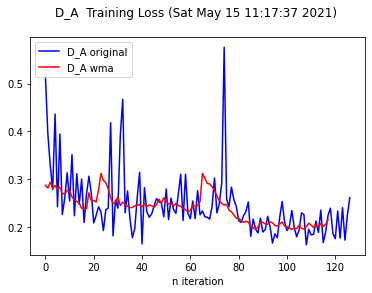

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import re
wma = ema(D_A,10)
plt.plot(D_A[17:], '-b', label='D_A original')
plt.plot(wma[17:], '-r', label='D_A wma')
plt.xlabel("n iteration")
plt.legend(loc='upper left')

title = "D_A "+ re.sub("=","",content[16])
plt.title(title)
plt.savefig(title+".png")  # should before show method
plt.show()

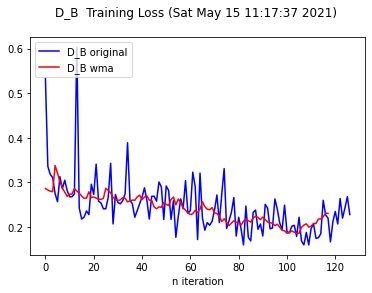

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import re
wma = ema(D_B,10)
plt.plot(D_B[17:], '-b', label='D_B original')
plt.plot(wma[17:], '-r', label='D_B wma')
plt.xlabel("n iteration")
plt.legend(loc='upper left')

title = "D_B "+ re.sub("=","",content[16])
plt.title(title)
plt.savefig(title+".png")  # should before show method
plt.show()

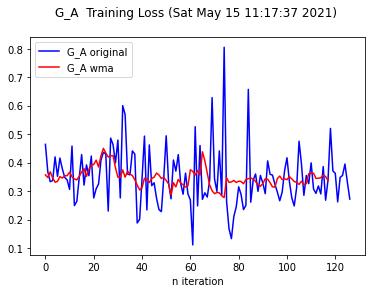

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import re
wma = ema(G_A,10)
plt.plot(G_A[17:], '-b', label='G_A original')
plt.plot(wma[17:], '-r', label='G_A wma')
plt.xlabel("n iteration")
plt.legend(loc='upper left')

title = "G_A "+ re.sub("=","",content[16])
plt.title(title)
plt.savefig(title+".png")  # should before show method
plt.show()

In [10]:
# some sample code for Plotting
import numpy as np
import matplotlib.pyplot as plt
# piecewise plot
def draw_loss(lst_iter, lst_loss, lst_acc, title):
    plt.plot(lst_iter, lst_loss, '-b', label='loss')
    plt.plot(lst_iter, lst_acc, '-r', label='accuracy')

    plt.xlabel("n iteration")
    plt.legend(loc='upper left')
    plt.title(title)

    # save image
    plt.savefig(title+".png")  # should before show method

    # show
    plt.show()

def test_draw():
    # iteration num
    lst_iter = range(100)

    # loss of iteration
    lst_loss = [0.01 * i + 0.01 * i ** 2 for i in xrange(100)]
    # lst_loss = np.random.randn(1, 100).reshape((100, ))

    # accuracy of iteration
    lst_acc = [0.01 * i - 0.01 * i ** 2 for i in xrange(100)]
    # lst_acc = np.random.randn(1, 100).reshape((100, ))
    draw_result(lst_iter, lst_loss, lst_acc, "sgd_method")

=
